In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df["genre"].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [5]:
df.shape

(22579, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

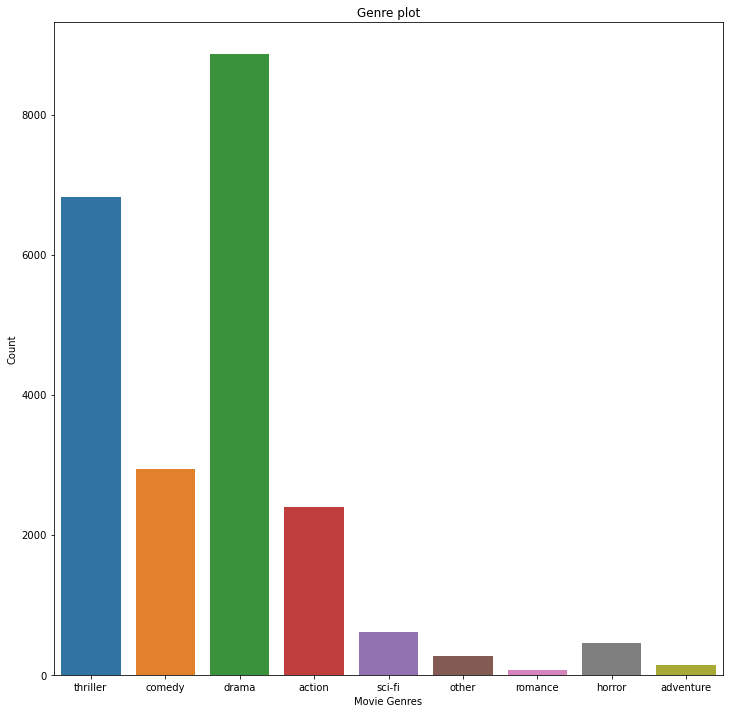

In [8]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre',data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre plot')
plt.show()

Data Cleaning and Preprocessing

In [9]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
df.isnull().any()

id       False
text     False
genre    False
dtype: bool

In [11]:
df.drop('id',axis=1,inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [12]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    
    #Cleaning special character from the dialog\script
    dialog = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string=df['text'][i])
    
    #Converting the entire dialog/script into lower case
    dialog = dialog.lower()
    
    # Tokennizing the dialog/script by words
    words = dialog.split()
    
    # Removing the stop words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Steming the words
    words = [ps.stem(word) for word in dialog_words]
    
    # Joining the stemmed words
    dialog = ' '.join(words)
    
    # Creating a corpus
    corpus.append(dialog)

In [15]:
len(corpus)

22579

In [16]:
# using for loop looping the index of genre 4 and appending the corresponding genre word
# to the new list.
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])
    
action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])
    
comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

# converting the list to str 
    
drama = ''
action = ''
comedy = ''
for i in range(0,3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

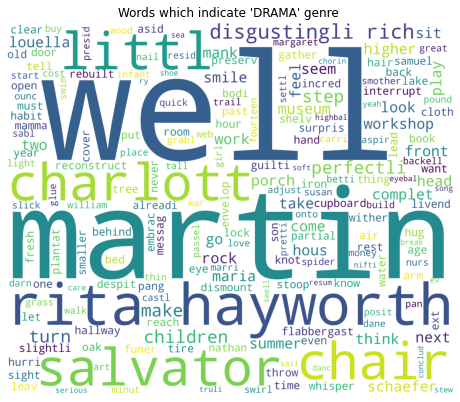

In [17]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()


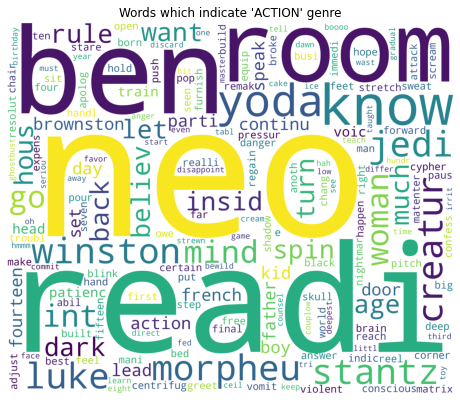

In [18]:
wordcloud2 = WordCloud(background_color='white',width=3000,height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre")
plt.show()

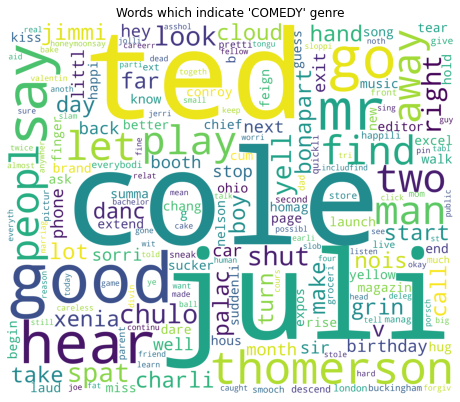

In [19]:
wordcloud3 = WordCloud(background_color='white',width=3000,height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre")
plt.show()

MODEL BUILDING

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()
y = df['genre'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


Multinomial Navie Bayes

In [22]:
# Fitting Navie Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [23]:
#predicting the test set results
nb_y_pred = nb_classifier.predict(X_test)

In [24]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("______ Score ______")
print("Accuracy score is: {}%".format(round(score1*100,2)))

______ Score ______
Accuracy score is: 89.57%


In [26]:
# Making the  confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [27]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

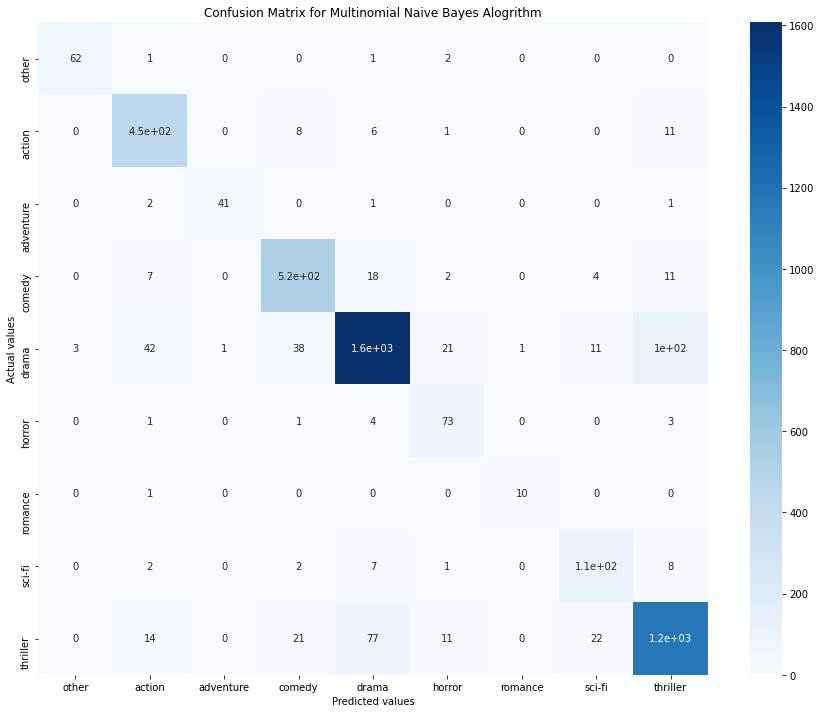

In [29]:
# Ploting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action','adventure', 'comedy','drama', 'horror','romance','sci-fi','thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Alogrithm')
plt.show()

In [30]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

###Predictions

In [34]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [35]:
# For generating random integer
from random import randint

In [36]:
# Loading test dataset
test = pd.read_csv('test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [37]:
test.shape

(5589, 2)

In [38]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: get it! DOROTHY Oh! Oh! CS Scarecrow Dorothy and Tin Man Tin Man looks at dead bee in his hand speaks and cries DOROTHY Oh TIN MAN Oh, see I killed it. Oh, I killed that poor little honey bee! DOROTHY Oh oh CU Tin Man crying speaks TIN MAN It's only a man without a head who could do a thing like that. Poor little bee. CU Dorothy reacts reaches o.s. DOROTHY Oh, there.... CU The Tin Man as Dorothy reaches in wipes away his tears DOROTHY ...there. Don't cry. There. CU Dorothy looks o.s. speaks DOROTHY As a matter of fact, that's just an old drone bee, and it would have died.... CU Tin Man looks o.s. DOROTHY o.s. ...anyway. TIN MAN Yes? DOROTHY o.s. You put it out of its misery. TIN MAN Oh. DOROTHY o.s. It's.... CS Scarecrow Dorothy and Tin Man they speak and laugh DOROTHY ...just that the Witch is so wicked. I don't think you two ought to come with me because you'll get into trouble. SCARECROW Oh, you don't think we're going to stand by and let her get away with fireballs and bees

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: e is Bond. James Bond. Harmsway greets Bond with a warm smile. Yet his words are ambiguous HARMSWAY Always nice to meet one of her Majesty's fellow subjects... a nod to Valentin Especially one with such distinguished friends. BOND You might say I've always been one of Mr. Valentin's biggest followers. VALENTIN chortling 'Biggest followers?' He's practically made a career' of it!! He laughs. Bond decides to pull Harmsway's chain. BOND It's a beautiful boat, Sir Elliot. Practically glows in the dark. HARMSWAY smiles I can tell you're a man with an eye for exquisite possessions, Mr. Bond. signaling off camera Darling! Come here. beat I want you to meet my wife. A woman appears in frame, her face obscured by a large sun hat. As she reveals her face to the camera and Bond HARMSWAY Paris Harmsway, allow me to introduce you to James Bond. There is a terrified look on her face. Harmsway continues, beaming his most insinuating smile HARMSWAY But then... I believe you two have already me

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ting now and continuing throughout is this the sound of typing. CUT TO PAUL'S ROOM PAUL, working at his typewriter. CUT TO THE MANUSCRIPT. Growing. CUT TO ANNIE'S BEDROOM. DUSK. ANNIE, in her room. Reading and loving it. CUT TO BUSTER'S DEN. NIGHT. BUSTER sitting in his den reading a Misery novel by the fire. VIRGINIA brings him a cup of tea. CUT TO PAUL'S ROOM. DAY. PAUL, the sling off, moving his injured arm. It's more mobile than before. Testing his strength, he uses his arm to remove the page and place it on the pile. He puts in another page and continues to type. CUT TO ANNIE, entering Paul's room, carrying a chapter. Handing him a cup of tea. ANNIE Paul, this is positively the best Misery you've ever written. PAUL I think you're right. CUT TO THE PILE OF PAPER. Bigger. CUT TO OUTSIDE THE BARN ANNIE, out by the barn. She stares in at the house. Framed in the window is PAUL, working. She smiles, enters the barn. CUT TO PAUL'S ROOM. NIGHT. He stretches but only briefly, then

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  brain. From there, Sailor steps firmly into the crazy zone. Amidst blood curdling hysterical screams from a growing throng of SOUTHERN BELLES, Sailor starts taking Bob Ray apart limb by limb and doesn't stop until Bob Ray lays completely destroyed and completely dead at the foot of the stairs. The crowd of formally dressed onlookers stand aghast. Sailor stares up at Marietta. Both their eyes burning with hate. CUT TO INT. IGUANA MOTEL SAILOR AND LULA'S ROOM NIGHT Sailor is dripping with sweat. His teeth are clenched tight and his fists violently grip the sheets, as if any minute he could tear the bed apart. CUT TO INT. PERDITA DURANGO'S HOUSE NIGHT Bobby lets the screen door bang shut behind him as he comes in and roams around the living room. PERDITA Nice of you to drop by. BOBBY Told ya I would. You still riled? PERDITA laughs You still screwing sixteen year olds in the ass? Bobby keeps circling. BOBBY Ain't never had no girl pull a blade on me. PERDITA Wish I'd fuckin' cut 

In [44]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: He takes a deep breath and starts walking toward his club about twenty yards away. INT. GOLF CART. DAY In the cart. Bob's driving. There's a brief silence. BOB You don't have to talk about it if you don't want to. ANTHONY No, I don't mind. BOB I know it must of been a bad experience. But it doesn't sound like it was your fault. ANTHONY Well, I didn't mean to electrocute him. But the whole operation was my idea. MONTAGE Electronics wizardry. Splicing wires. Buzzing electrodes. A filament lights up blue. Pliers and clippers rewire a circuit breaker, short out the P.A. system, electrify doors and windows. Anthony continues in VOICEOVER. ANTHONY V.O. It took six months of research. I did all the wiring myself. Switched AC to DC. Doubled the voltage. Shorted out the generator. The whole school was shut down. BOB V.O. That's pretty complicated for a senior prank. ANTHONY V.O. I don't like that word prank, Bob. I was trying to do something more than a prank. EXT. SCHOOL. DAY A large s